In [1]:
import numpy as np
import cartopy.crs as ccrs
import xarray as xr
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA  # biblioteca para realização da ACP

In [2]:
dados = xr.open_dataset('sst_ndjfm_anom.nc')
tsm = dados.sst
print(tsm)

<xarray.DataArray 'sst' (time: 50, latitude: 18, longitude: 30)> Size: 216kB
[27000 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 400B 1963-01-15T12:00:00 ... 2012-01-16
  * latitude   (latitude) float32 72B -22.5 -17.5 -12.5 -7.5 ... 52.5 57.5 62.5
  * longitude  (longitude) float32 120B 117.5 122.5 127.5 ... 252.5 257.5 262.5
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      NDJFM mean SST anomalies


In [3]:
# transforma o dado 3D (time, lat e lon) em 2D (time, pontos de grade)
# a ACP será aplicada a esses dados.
tsm_2D = tsm.stack(pontos = ('latitude','longitude'))
print(tsm_2D)

<xarray.DataArray 'sst' (time: 50, pontos: 540)> Size: 216kB
array([[ 0.43180798,         nan,         nan, ...,         nan,
                nan,         nan],
       [ 0.29283554,         nan,         nan, ...,         nan,
                nan,         nan],
       [-0.28564902,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [ 0.32797353,         nan,         nan, ...,         nan,
                nan,         nan],
       [ 0.78292718,         nan,         nan, ...,         nan,
                nan,         nan],
       [ 0.55678949,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * time       (time) datetime64[ns] 400B 1963-01-15T12:00:00 ... 2012-01-16
  * pontos     (pontos) object 4kB MultiIndex
  * latitude   (pontos) float32 2kB -22.5 -22.5 -22.5 -22.5 ... 62.5 62.5 62.5
  * longitude  (pontos) float32 2kB 117.5 122.5 127.5 ... 252.5 257.5 262.5
Attributes:
    standard_name:  sea

In [4]:
# aqui, cria-se um arranjo 1D, cuja estrutura servirá para criar
# o DataArray 2D para os padrões, contendo as coordenadas espaciais
tsm_dp_1D = tsm_2D.dropna(dim='pontos').std(dim='time')
print (tsm_dp_1D )

<xarray.DataArray 'sst' (pontos: 450)> Size: 4kB
array([0.51152379, 0.37493966, 0.29047127, 0.26170865, 0.29938732,
       0.35392465, 0.41379639, 0.42733909, 0.42005073, 0.44567562,
       0.48280688, 0.5569946 , 0.57544367, 0.5610063 , 0.48613483,
       0.45268683, 0.38312324, 0.36802196, 0.35852986, 0.32023718,
       0.32830262, 0.3761616 , 0.45328136, 0.55574177, 0.57914942,
       0.34718635, 0.43864359, 0.39931338, 0.32642927, 0.28279832,
       0.30316251, 0.33138076, 0.39393393, 0.4025588 , 0.36533828,
       0.29478768, 0.28566788, 0.33613716, 0.33318757, 0.35381778,
       0.36447448, 0.39465117, 0.42919223, 0.4515484 , 0.50282969,
       0.51693918, 0.49534795, 0.46403935, 0.49210866, 0.49284196,
       0.50613536, 0.50104105, 0.32416495, 0.37515395, 0.54893494,
       0.49493826, 0.39961162, 0.34989739, 0.34196044, 0.31875564,
       0.29994356, 0.3125842 , 0.359205  , 0.37346899, 0.32284061,
       0.27559715, 0.28663466, 0.39533187, 0.38145001, 0.47251929,
       0.5136

In [5]:
# retirando os NaNs dos dados, o que impossibilita o cálculo dos autovetores e autovalores
tsm_2D_noNAN = tsm_2D.dropna( dim='pontos' )
print(tsm_2D_noNAN)

<xarray.DataArray 'sst' (time: 50, pontos: 450)> Size: 180kB
array([[ 0.43180798,  0.1630861 ,  0.08017219, ..., -0.12540398,
        -0.49084109,  1.06179475],
       [ 0.29283554, -0.16680923, -0.21215791, ..., -0.12209211,
        -0.09883553,  0.55590133],
       [-0.28564902, -0.41418546, -0.2408477 , ..., -0.06737086,
        -0.32778147, -0.23831127],
       ...,
       [ 0.32797353,  0.29415896,  0.36296028, ...,  0.76847685,
         0.57203314, -0.42251657],
       [ 0.78292718,  0.14445034,  0.25374836, ...,  0.93450998,
         0.02784106, -0.64168214],
       [ 0.55678949,  0.17888817,  0.29620397, ...,  0.77207239,
         0.45855923, -0.74340134]])
Coordinates:
  * time       (time) datetime64[ns] 400B 1963-01-15T12:00:00 ... 2012-01-16
  * pontos     (pontos) object 4kB MultiIndex
  * latitude   (pontos) float32 2kB -22.5 -22.5 -22.5 -22.5 ... 62.5 62.5 62.5
  * longitude  (pontos) float32 2kB 117.5 147.5 152.5 ... 177.5 182.5 212.5
Attributes:
    standard_name:  sea

In [6]:
pca = PCA(n_components=2)

In [7]:
pca.fit( tsm_2D_noNAN )

PCA(n_components=2)

In [8]:
print('Variância de cada CP:')
print( pca.explained_variance_ )   # autovalores da matriz de covariâncias
print('Proporção da variância representada por cada CP:')
print( pca.explained_variance_ratio_)

Variância de cada CP:
[60.45080732 17.30716075]
Proporção da variância representada por cada CP:
[0.46009969 0.13172726]


In [9]:
# autovetores, dado pelo atributo 'componentes_' do objeto 'pca'
vetores = pca.components_ 
#print(vetores)

In [17]:
# Como os autovetores possuem comprimento unitário, podemos tornar os valores dos autovetores como
# representativos da correlação entre a componente principal e as variáveis originais. Para isso,
# precisa-se multiplicar o elementos do autovetor pelo respectivo autovalor e dividir cada elemento
# pelo desvio padrão dos dados originais, nos respectivos pontos (primeiro escalonamento indicado na Tabela 11.3 de Wilks(2006))
vetores1 = vetores[0] * np.sqrt( pca.explained_variance_[0] ) / tsm_dp_1D
print(vetores1.max())
print(vetores1.min())
print(vetores1.shape)

<xarray.DataArray 'sst' ()> Size: 8B
array(0.97399511)
<xarray.DataArray 'sst' ()> Size: 8B
array(-0.78626716)
(450,)


In [11]:
# usando a DataArray da média do campo de TSM em 1D para fornecer coordenadas ao primeiro autovetor
padrao1_sktl = tsm_dp_1D.copy( data = vetores1 ).unstack()
print(padrao1_sktl)

<xarray.DataArray 'sst' (latitude: 18, longitude: 30)> Size: 4kB
array([[-0.34465438,         nan,         nan,         nan,         nan,
                nan,  0.13365345,  0.08797239, -0.11060239, -0.19567852,
        -0.3322133 , -0.50666291, -0.60970456, -0.66637839, -0.65521013,
        -0.58311566, -0.54809469, -0.56649082, -0.53753608, -0.39833548,
        -0.27769686, -0.23286959, -0.14812631, -0.02176744,  0.1650222 ,
         0.25490247,  0.31564187,  0.448953  ,  0.40658403,  0.3783725 ],
       [-0.09990055,  0.1376044 ,         nan,         nan,         nan,
         0.18954213,  0.04649578, -0.15873456, -0.23686057, -0.23566329,
        -0.31145934, -0.47606341, -0.617427  , -0.58249949, -0.33378804,
        -0.16186127, -0.0779253 ,  0.02935143,  0.21978352,  0.44544262,
         0.5705442 ,  0.64656775,  0.71870982,  0.75242193,  0.74555041,
         0.74375601,  0.68788117,  0.58653631,  0.56153248,  0.52378294],
       [ 0.31462734,  0.36600644,  0.31179864,  0.2312080

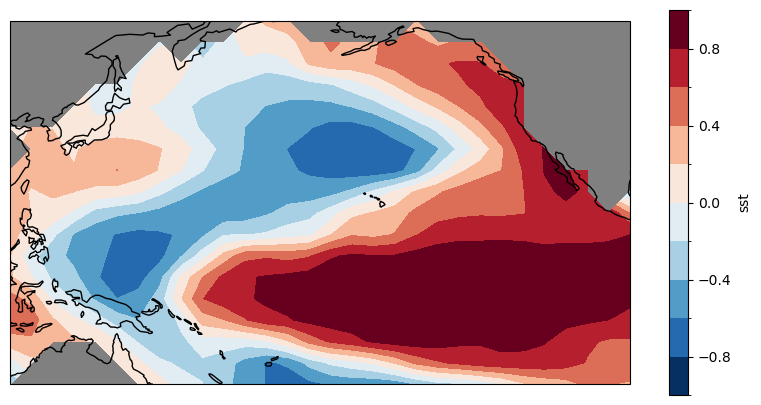

In [16]:
# plotando o campo do padrão 1
plt.figure(figsize=(10,5))
mapa = padrao1_sktl.plot.contourf(
    subplot_kws=dict(projection=ccrs.PlateCarree(central_longitude=-170), facecolor="gray"),
    transform=ccrs.PlateCarree(),levels = np.linspace(-1, 1, 11)
)

mapa.axes.coastlines()
plt.show()

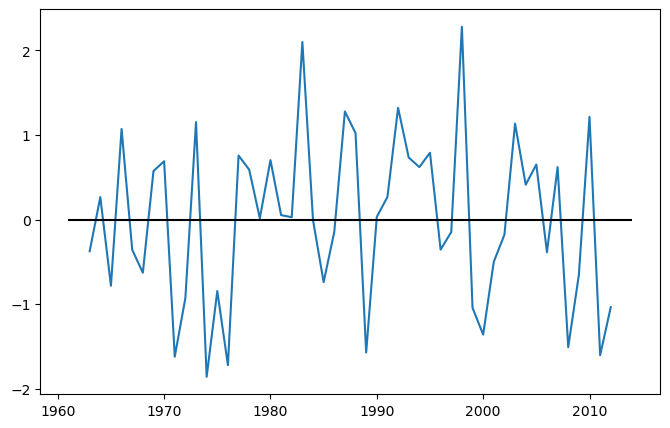

In [13]:
# série temporal do primeiro padrão
anos = tsm.time.dt.year
plt.figure(figsize=(8,5))
CP = pca.fit_transform( tsm_2D_noNAN )
plt.plot( anos.values, CP[:,0] / np.sqrt( pca.explained_variance_[0] ) )  # normalizando variância da CP
plt.hlines(0,xmin=anos.min()-2,xmax=anos.max()+2,color='black')
plt.show()